In [78]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [79]:
train_dataset = 'data/train.csv'
test_dataset = 'data/test.csv'
model_save_path = 'model/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier.tflite'

# Set number of classes

In [80]:
NUM_CLASSES = 32

# Dataset reading

In [81]:
X_train = np.loadtxt(train_dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
X_test = np.loadtxt(test_dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))


In [82]:
y_train = np.loadtxt(train_dataset, delimiter=',', dtype='int32', usecols=(0))
y_test = np.loadtxt(test_dataset, delimiter=',', dtype='int32', usecols=(0))

In [83]:
# X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [84]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [85]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_10 (Dropout)        (None, 42)                0         
                                                                 
 dense_15 (Dense)            (None, 20)                860       
                                                                 
 dropout_11 (Dropout)        (None, 20)                0         
                                                                 
 dense_16 (Dense)            (None, 10)                210       
                                                                 
 dense_17 (Dense)            (None, 32)                352       
                                                                 
Total params: 1422 (5.55 KB)
Trainable params: 1422 (5.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [87]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [88]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
39/75 [==============>...............] - ETA: 0s - loss: 3.4731 - accuracy: 0.0280 
Epoch 1: saving model to model\keypoint_classifier.hdf5
75/75 [==============================] - 1s 4ms/step - loss: 3.4602 - accuracy: 0.0298 - val_loss: 3.4271 - val_accuracy: 0.0562
Epoch 2/1000
43/75 [================>.............] - ETA: 0s - loss: 3.4250 - accuracy: 0.0403
Epoch 2: saving model to model\keypoint_classifier.hdf5
75/75 [==============================] - 0s 2ms/step - loss: 3.4131 - accuracy: 0.0449 - val_loss: 3.3542 - val_accuracy: 0.0663


c:\Users\zeins\anaconda3\envs\lsl\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/1000
43/75 [================>.............] - ETA: 0s - loss: 3.3570 - accuracy: 0.0705
Epoch 3: saving model to model\keypoint_classifier.hdf5
75/75 [==============================] - 0s 2ms/step - loss: 3.3466 - accuracy: 0.0692 - val_loss: 3.2571 - val_accuracy: 0.1121
Epoch 4/1000
44/75 [================>.............] - ETA: 0s - loss: 3.2735 - accuracy: 0.0813
Epoch 4: saving model to model\keypoint_classifier.hdf5
75/75 [==============================] - 0s 2ms/step - loss: 3.2524 - accuracy: 0.0848 - val_loss: 3.1139 - val_accuracy: 0.1242
Epoch 5/1000
43/75 [================>.............] - ETA: 0s - loss: 3.1593 - accuracy: 0.1027
Epoch 5: saving model to model\keypoint_classifier.hdf5
75/75 [==============================] - 0s 2ms/step - loss: 3.1341 - accuracy: 0.1047 - val_loss: 2.9538 - val_accuracy: 0.1489
Epoch 6/1000
43/75 [================>.............] - ETA: 0s - loss: 3.0518 - accuracy: 0.1163
Epoch 6: saving model to model\keypoint_classifier.hdf5
75/75

In [89]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

 1/33 [..............................] - ETA: 0s - loss: 1.2109 - accuracy: 0.8516

33/33 [==============================] - 0s 969us/step - loss: 1.3364 - accuracy: 0.6932


In [90]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [91]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 46ms/step
[6.13275051e-01 2.42532820e-07 3.52057233e-03 1.11909015e-11
 2.89367832e-04 2.89396290e-02 6.31579056e-08 1.62241067e-05
 1.71248830e-05 2.27297708e-01 1.78205781e-03 2.51555853e-02
 3.68225854e-03 1.04160824e-06 7.73283541e-02 3.28564354e-09
 8.72673767e-10 8.56945306e-08 1.07213937e-05 5.61455381e-04
 1.65630183e-06 5.60235676e-05 2.69014781e-05 7.98911337e-09
 8.62577185e-03 2.71196950e-06 3.72648635e-03 2.33771999e-07
 1.43575761e-03 8.23514483e-08 3.45593820e-09 4.24678996e-03]
0


# Confusion matrix

130/130 [==============================] - 0s 814us/step


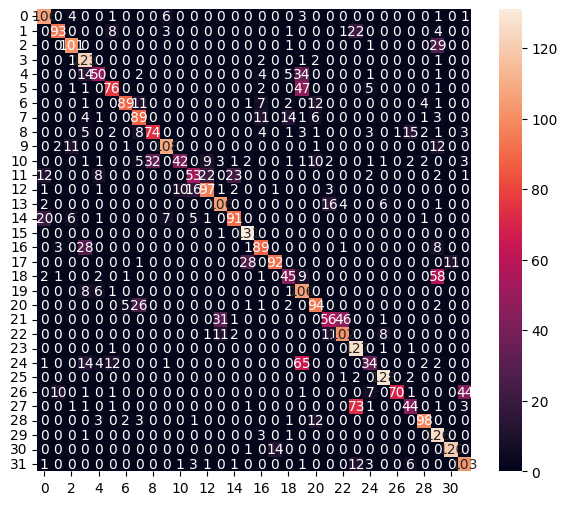

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       122
           1       0.85      0.70      0.77       132
           2       0.81      0.77      0.79       132
           3       0.61      0.95      0.74       130
           4       0.65      0.45      0.53       111
           5       0.74      0.57      0.64       133
           6       0.91      0.70      0.79       128
           7       0.61      0.68      0.65       130
           8       0.70      0.60      0.65       123
           9       0.86      0.80      0.83       135
          10       0.79      0.35      0.49       119
          11       0.68      0.43      0.53       123
          12       0.74      0.73      0.74       132
          13       0.69      0.79      0.74       135
          14       0.75      0.69      0.72       132
          15       0.79      0.99      0.88       132
          16       0.72      0.68      0.70       130
     

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [93]:
# Save as a model dedicated to inference
model.save(model_save_path)

c:\Users\zeins\anaconda3\envs\lsl\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [94]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\zeins\AppData\Local\Temp\tmpnz386doj\assets


INFO:tensorflow:Assets written to: C:\Users\zeins\AppData\Local\Temp\tmpnz386doj\assets


7852

# Inference test

In [95]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [96]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [97]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [98]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.1327505e-01 2.4253282e-07 3.5205754e-03 1.1190922e-11 2.8936795e-04
 2.8939629e-02 6.3157906e-08 1.6224090e-05 1.7124881e-05 2.2729771e-01
 1.7820578e-03 2.5155591e-02 3.6822602e-03 1.0416103e-06 7.7328376e-02
 3.2856433e-09 8.7267199e-10 8.5694531e-08 1.0721384e-05 5.6145561e-04
 1.6563018e-06 5.6023513e-05 2.6901476e-05 7.9891125e-09 8.6257756e-03
 2.7119745e-06 3.7264880e-03 2.3377200e-07 1.4357576e-03 8.2351448e-08
 3.4559378e-09 4.2467900e-03]
0
CPU times: total: 0 ns
Wall time: 0 ns
